# Evaluation for Classification

## How to deal with imbalanced classes ?

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


As seen, this dataset has balanced classes. 

let's use this dataset to create two imbalanced classes. 

In [22]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced !=1] = 0

print('Original labels:  ', y[1:30])
print('New binary labels:', y_binary_imbalanced[1:30])

Original labels:   [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels: [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [23]:
np.bincount(y_binary_imbalanced)

array([1615,  182])

Now, we can see that there is 182 objects in the 1 class and 1615 in the 0 class which is a good representative of imbalanced classes. 

If we check the accuracy of the new dataset using SVM classifer, we can see a very high accuracy

In [24]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.90888888888888886

In [28]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

## Dummy Classifiers

Dummy classifiers are very useful in understaing if the accuracy of your model is not based on the imbalancing classes. Dummy classifiers don't look at the features at all and alwasy just blindly predicting the most frequent classes or using other kind of startegies. 

In [34]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

As seen, the dummpy classifier is always predicting 0s classes based on the most frequent ones from the training dataset. 

In [35]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

 ### Important notes:
 - Dummy classifiers serve as a sanity check on classifier's performance
 - They provide a null metric (e.g. null accuracy) baseline
 - Dummy classifiers should not be used for the real problems

#### Some commonly used settings for the *strategy* parameter for DummyClassifier in scikit-learn
- *most_frequent* : predicts the most frequent label in the training set
- *stratified* : random predictions based on training set class distribution
- *uniform* : generates predictions unifromely at random
- *constant* : always predicts a constant label provided by the user
    - A major motivation of this method is F1-scoring, when the positive class is in the minority.

### What if my classifier accuracy is close to the null accuracy baseline (dummy classifiers)?
This could be a sign of:
    - Ineffective, erroneous or missing features
    - Poor choice of kernerl or hyperparameter
    - Large class imbalance

For example, what if we change the *kernel* hyperparameter of SVM to *linear*

In [36]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.97777777777777775

In general, for imbalanced classification problems we should use other metrics other than accuracy. One of the metrics which is useful deaing with imbalanced classification problems is called **AUC** (Area Under the Curve)

### Dummy Regressors:
*Strategy parameter options*:
- mean : predicts the mean of the training targets
- median : predicts the median of the training targets
- quantile : predicts a user-provided quantile of the training targets
- constant: predicts a constant user-provided valued

### Binary Prediction Outcomes (Confusion matrix)
- True Negative (TN)
- False Positive (FP) --- Type 1 error
- False Negative (FN) --- Type 2 error
- True Positive (TP)

### Confusion matrices
#### Binary (two classes) confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_test)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)


Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


It's important to note that the true success of the classifier is in the diagonal and the off-diagonal part shows different error. 

What if we use *stratified* for the strategy of the dummy classifier?

In [40]:
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional predictions (dummy classifier)\n', confusion)

Random class-proportional predictions (dummy classifier)
 [[370  37]
 [ 37   6]]


How about using SVM now?

In [41]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


How about using logistic regression?

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


How about using decision trees?

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, dt_predicted)

print('Decision tree classifier (max_depth=2)\n', confusion)


Decision tree classifier (max_depth=2)
 [[400   7]
 [ 17  26]]


How about changing the max_depth=5

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, dt_predicted)

print('Decision tree classifier (max_depth=5)\n', confusion)


Decision tree classifier (max_depth=5)
 [[402   5]
 [  8  35]]


## Visualization of Different Error Types 

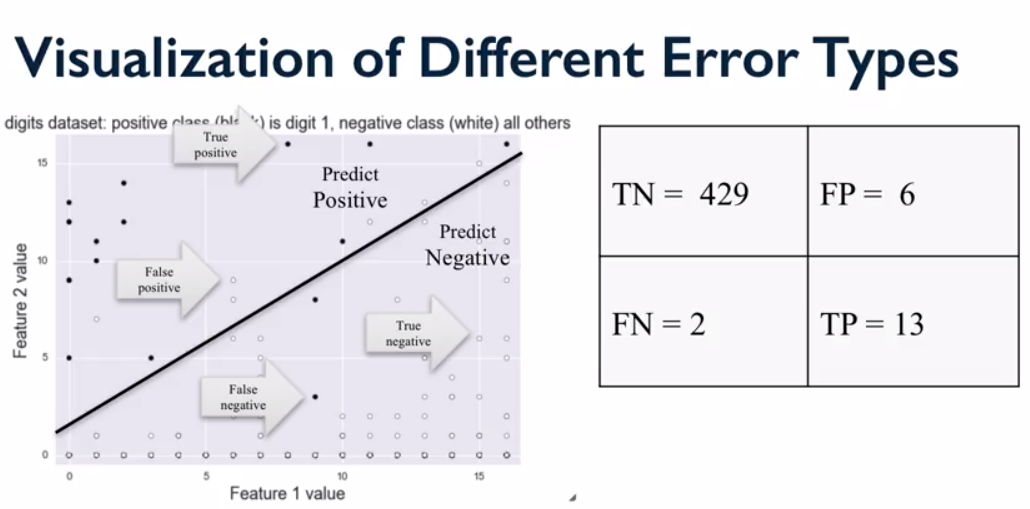

In [50]:
from IPython.core.display import Image, display
Image('different_error_types.png')

## Evaluation metrics for binary  classification

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, dt_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, dt_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, dt_predicted)))
print('f1 score: {:.2f}'.format(f1_score(y_test, dt_predicted)))

Accuracy: 0.97
Precision: 0.88
Recall: 0.81
f1 score: 0.84


In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dt_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.98      0.99      0.98       407
          1       0.88      0.81      0.84        43

avg / total       0.97      0.97      0.97       450



In [56]:
print('Random class-proportional (dummy)\n',
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n',
      classification_report(y_test, svm_predicted, target_names=['not 1', '1']))
print('Logistic regression\n',
      classification_report(y_test, lr_predicted, target_names=['not 1', '1']))
print('Decision tree(n_depth=5)\n',
      classification_report(y_test, dt_predicted, target_names=['not 1', '1']))

Random class-proportional (dummy)
              precision    recall  f1-score   support

      not 1       0.91      0.91      0.91       407
          1       0.14      0.14      0.14        43

avg / total       0.84      0.84      0.84       450

SVM
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.88      0.88      0.88        43

avg / total       0.98      0.98      0.98       450

Logistic regression
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.86      0.86      0.86        43

avg / total       0.97      0.97      0.97       450

Decision tree(n_depth=5)
              precision    recall  f1-score   support

      not 1       0.98      0.99      0.98       407
          1       0.88      0.81      0.84        43

avg / total       0.97      0.97      0.97       450



## Decision Functions

- Each classifer score value per test point indicates how confidantly the classifier predicts the positive class (large magnitued positive values) or the negative class (large magnitude negative class)
- Choosing a fixed decision threshold gives a classification rule
- By sweeping the decision threshold through the entire range of possbile score values, we get a series of classification outcomes that form a curve. 

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_scores_list = list(zip(y_test[0:30], y_scores_lr[1:30]))

y_scores_list

[(0, -13.541470729541413),
 (0, -21.722900989694729),
 (0, -18.907438437430027),
 (0, -19.735821729002289),
 (0, -9.7498078195600613),
 (0, 5.2349604859009276),
 (1, -19.307551661127864),
 (0, -25.101182889530396),
 (0, -21.827362391350579),
 (0, -24.151343401889438),
 (0, -19.576969790071697),
 (0, -22.574689400560423),
 (0, -10.823324268750714),
 (0, -11.912123406737392),
 (0, -10.97922371337485),
 (0, 11.206006114721543),
 (1, -27.646002317931909),
 (0, -12.859381428186682),
 (0, -25.848764845244997),
 (0, -21.649898622973378),
 (0, -12.208973849773741),
 (0, -23.863797215881473),
 (0, -9.3232117656131273),
 (0, -30.926701725861395),
 (0, -17.308638144375472),
 (0, -16.892590888898457),
 (0, -36.643680073197913),
 (0, -31.397247148803732),
 (0, -27.347877029399719)]

### Predicted Probability of Class Membership (predict_proba)

- Typical rule: choose most likely class
    - e.g class 1 if threshold > 0.50
- Adjusting threshold affects predictions of classifier
- Higher threshold restuls in a more conservative classifier
    - e.g. only predict Class 1 if estimated probability of class 1 is above 70 %
    - This increases precision. Doesn't predict class 1 as often, but when it does, it gets higher proportion of class 1 instances correct
- Not all models provide realistic probability estimates

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20, 1]))

y_proba_list

[(0, 8.59622935435435e-11),
 (0, 1.3152654562877047e-06),
 (0, 3.6801368532691122e-10),
 (0, 6.1461593657683724e-09),
 (0, 2.6843647432086779e-09),
 (0, 5.8302468525539246e-05),
 (1, 0.99470119196307671),
 (0, 4.119427394145904e-09),
 (0, 1.2551475474865303e-11),
 (0, 3.3151024835512065e-10),
 (0, 3.2449262447677433e-11),
 (0, 3.1465167386169614e-09),
 (0, 1.5701348842784633e-10),
 (0, 1.9928808739415592e-05),
 (0, 6.7085339693943354e-06),
 (0, 1.7052039108840334e-05),
 (1, 0.99998640787132853),
 (0, 9.8513045790707473e-13),
 (0, 2.6015997081086803e-06),
 (0, 5.9432508848392272e-12)]

## Precision-Recall & ROC Curves

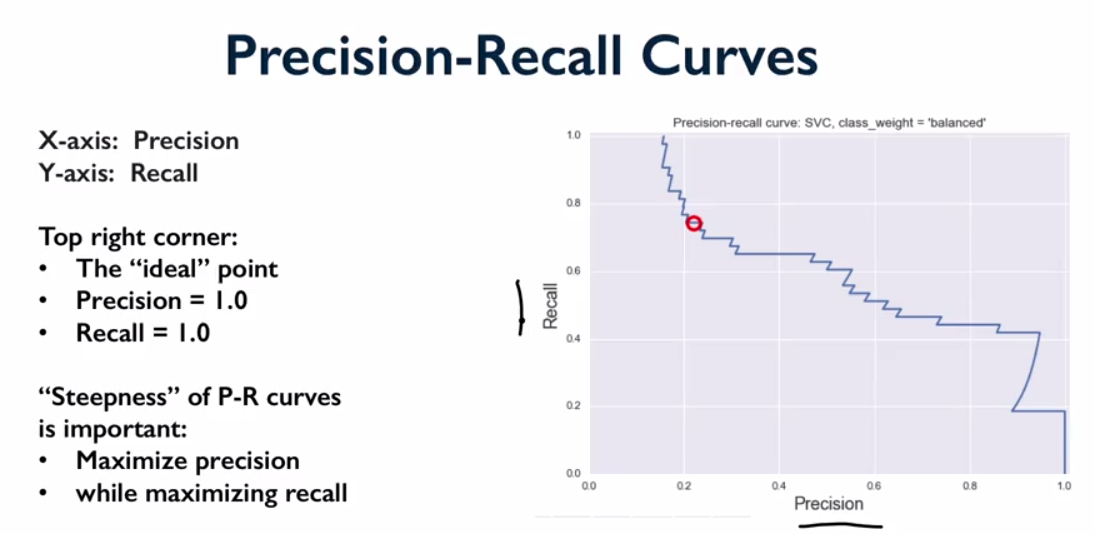

In [63]:
Image('Precision_Recall_Curve.png')

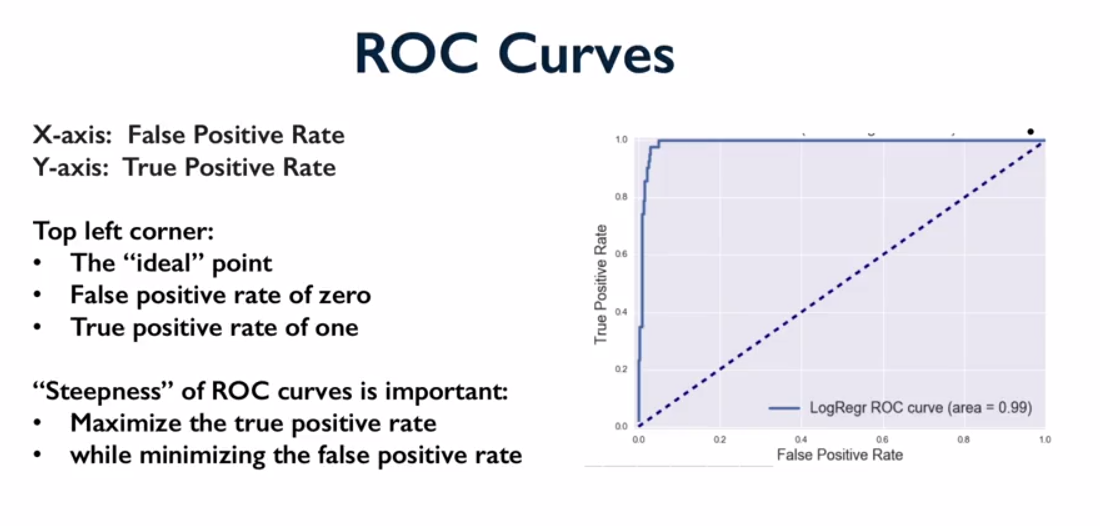

In [64]:
Image('ROC_Curve.png')

# Multi-Class Evaluation

- Multi-class evaluation is an extension of the binary case
    - A collection of true vs predicted binary outcomes, one per class
    - Confusion matrices are especially useful
    - Classification report
- Overall evaluation metrics are averages across classes
    - But there are different ways to average multi-class results: we will cover these shortly.
    - The support (number of instances) for each class is important to consider, e.g. in case of imbalanced classes
- Multi-label classification: each instance can have multiple labels

### Mulit-Class confution Matrix

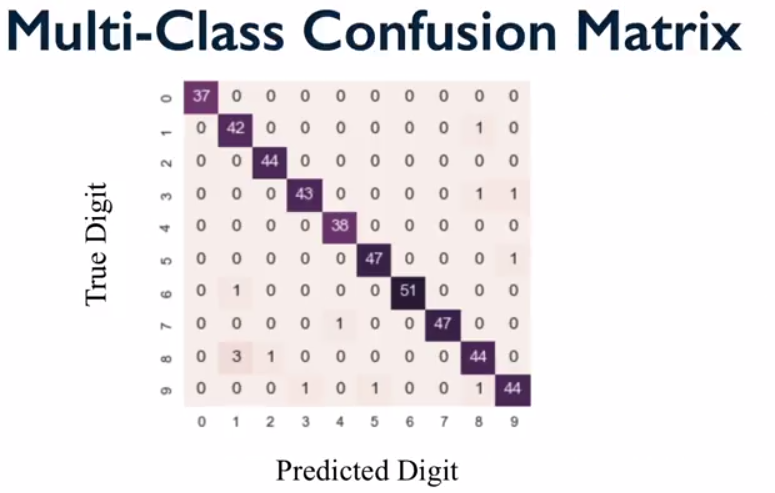

In [65]:
Image('Multiclass_confusion_matrix.png')

<IPython.core.display.Javascript object>


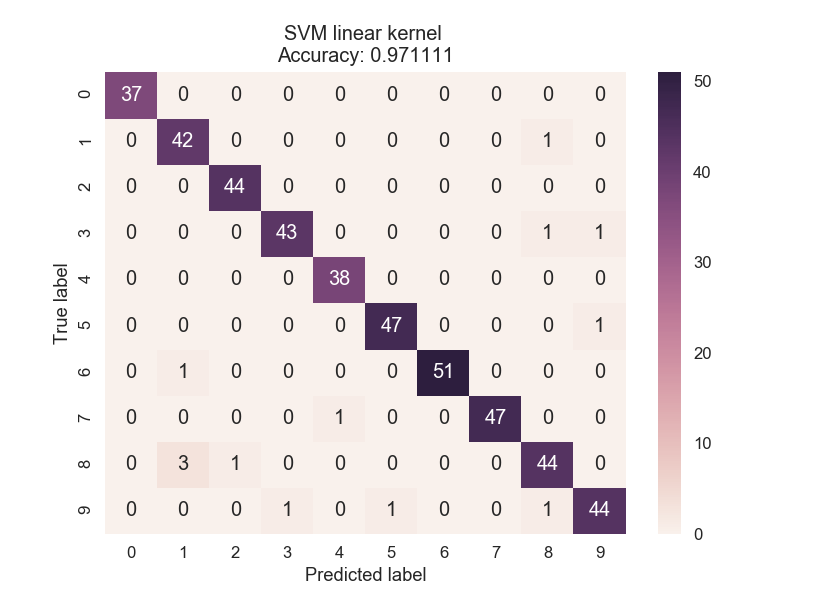

<IPython.core.display.Javascript object>


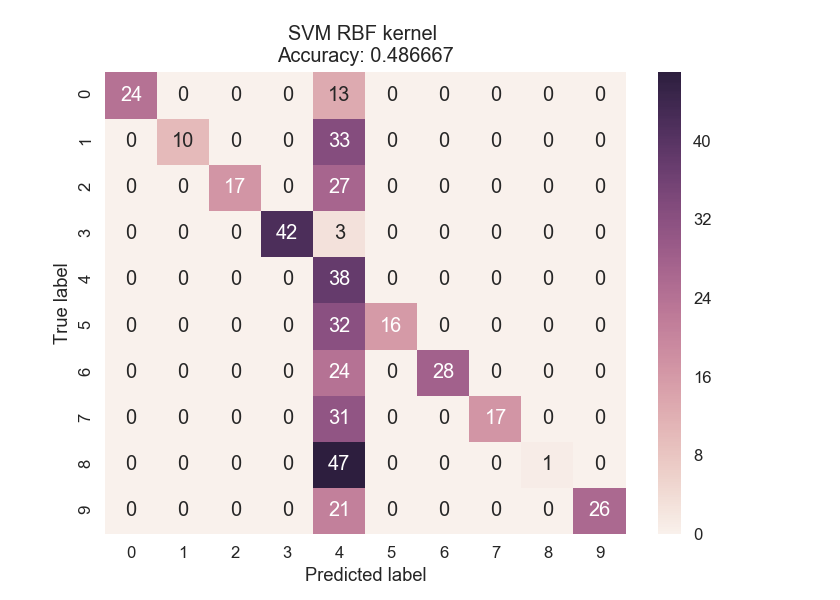

<IPython.core.display.Javascript object>


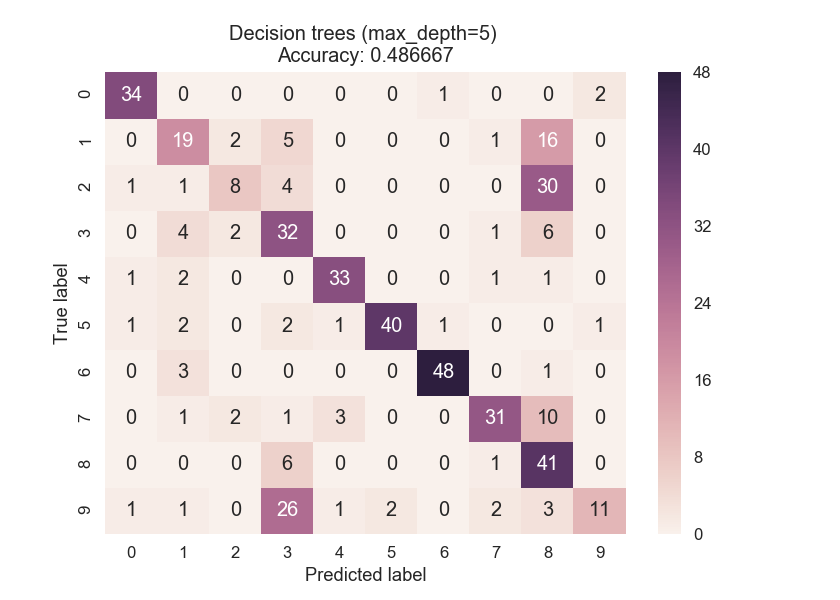

In [71]:
dataset = load_digits()

X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)

svm = SVC(kernel='linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc)

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True)
plt.title('SVM linear kernel \nAccuracy: {:3f}'.format(accuracy_score(y_test_mc, svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

svm = SVC(kernel='rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc)

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF kernel \nAccuracy: {:3f}'.format(accuracy_score(y_test_mc, svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

dt = DecisionTreeClassifier(max_depth=5).fit(X_train_mc, y_train_mc)
dt_predicted_mc = dt.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, dt_predicted_mc)
df_cm = pd.DataFrame(confusion_mc)

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True)
plt.title('Decision trees (max_depth=5) \nAccuracy: {:3f}'.format(accuracy_score(y_test_mc, svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')



### Multi-Class Classification report

In [72]:
print(classification_report(y_test_mc, svm_predicted_mc))

             precision    recall  f1-score   support

          0       1.00      0.65      0.79        37
          1       1.00      0.23      0.38        43
          2       1.00      0.39      0.56        44
          3       1.00      0.93      0.97        45
          4       0.14      1.00      0.25        38
          5       1.00      0.33      0.50        48
          6       1.00      0.54      0.70        52
          7       1.00      0.35      0.52        48
          8       1.00      0.02      0.04        48
          9       1.00      0.55      0.71        47

avg / total       0.93      0.49      0.54       450



## Micro vs Macro Average

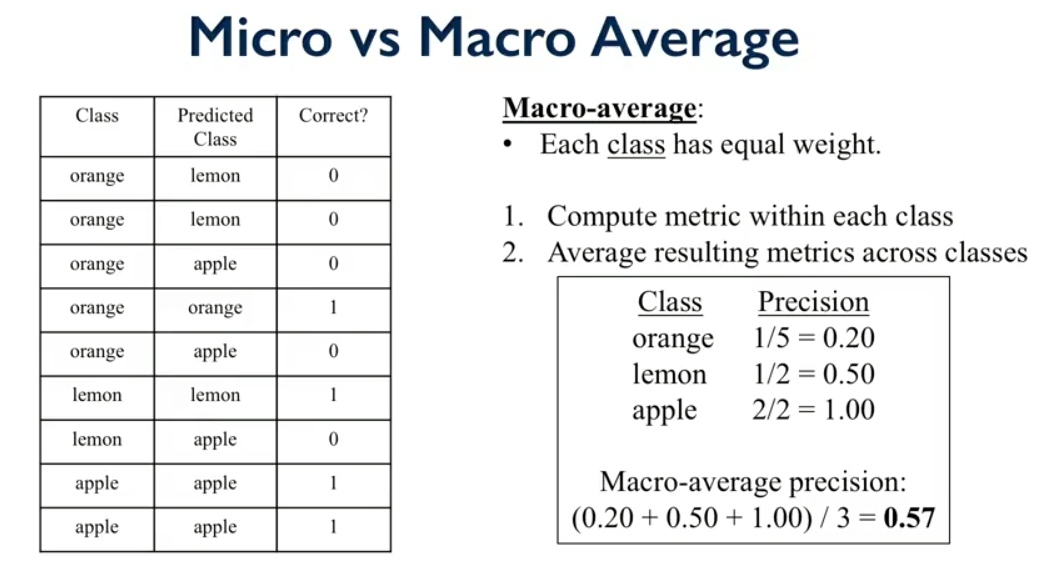

In [73]:
Image('Micro_vs_Macro_avg.png')

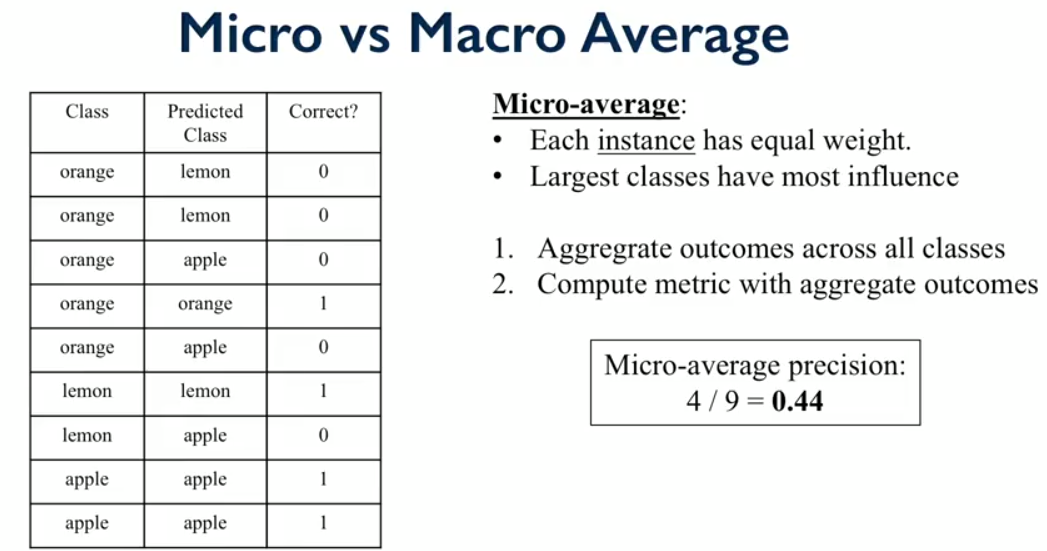

In [74]:
Image('Micro_avg.png')

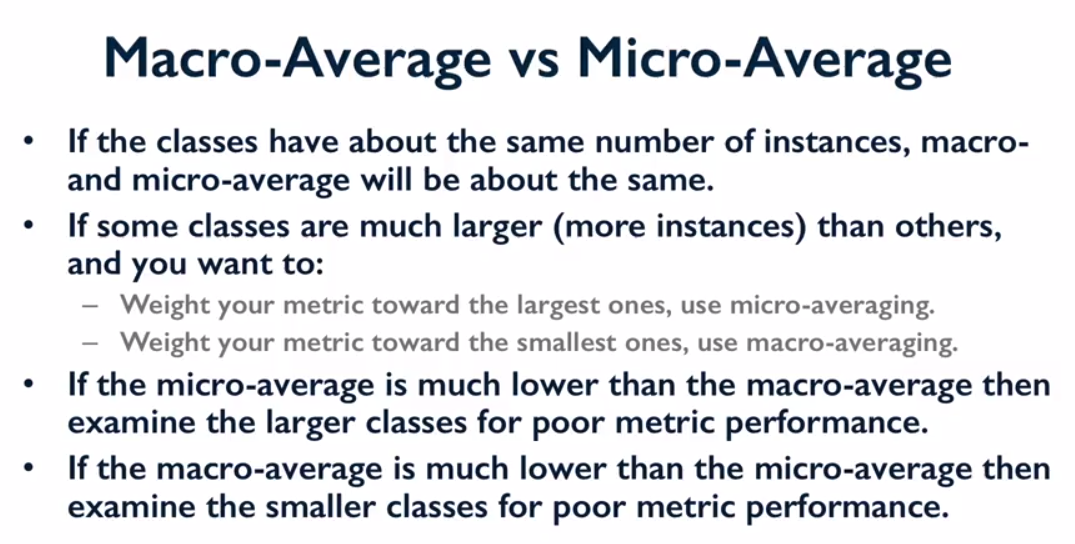

In [75]:
Image('Macro_Micro_explained.png')

### Micro vs macro averaged metrics

In [76]:
print('Micro-averaged precision = {:.2f} (treating instances equally)'.
    format(precision_score(y_test_mc, svm_predicted_mc, average='micro')))
print('Micro-averaged precision = {:.2f} (treating classes equally)'.
    format(precision_score(y_test_mc, svm_predicted_mc, average='macro')))

Micro-averaged precision = 0.49 (treating instances equally)
Micro-averaged precision = 0.91 (treating classes equally)


## Regression Evaluation

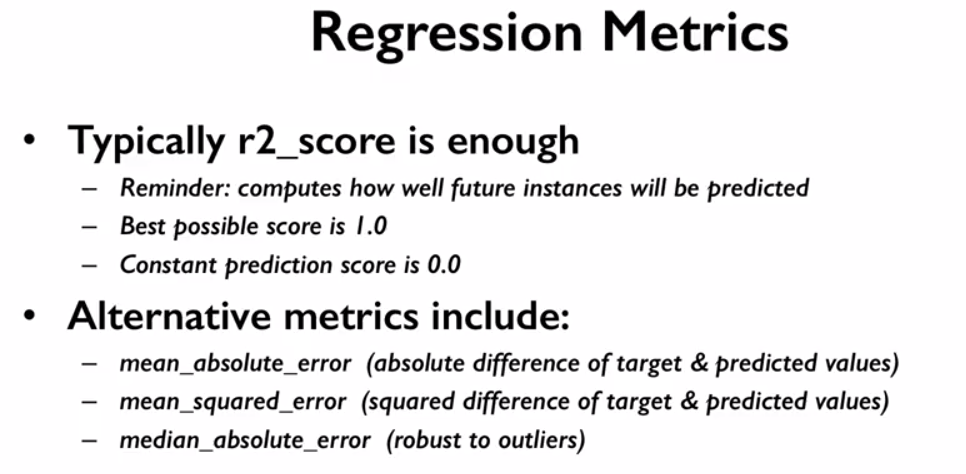

In [77]:
Image('Regression_evaluation.png')

### Dummy Regressor

As in classification, comparison to 'dummy' prediction model that uses a fixed rule can be useful. For this, scikit.learn provides **dummy regressor**

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
R2_score (dummy): -0.00
R2_score (linear model): 0.06


<IPython.core.display.Javascript object>


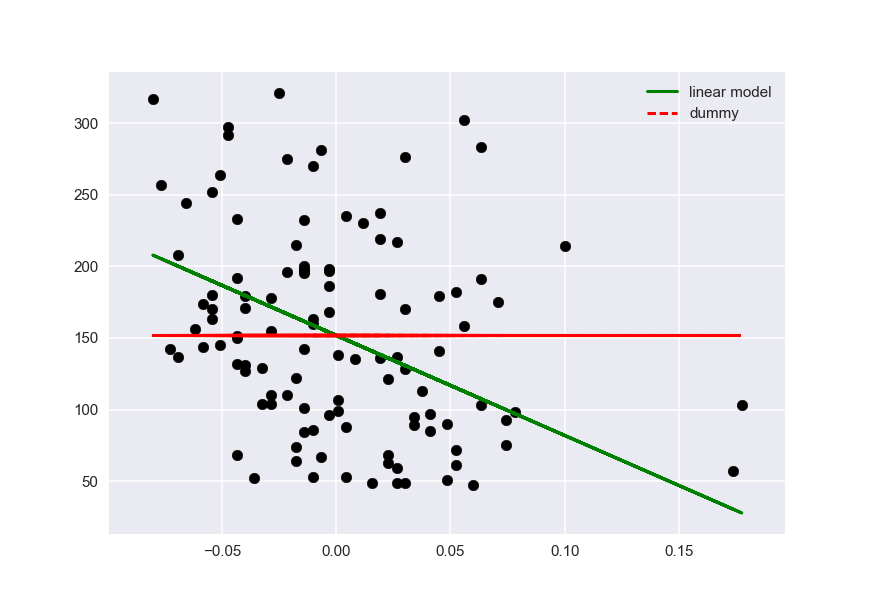

In [82]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data[: , None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print('Mean squared error (dummy): {:.2f}'.format(mean_squared_error(y_test, y_predict_dummy_mean)))
print('Mean squared error (linear model): {:.2f}'.format(mean_squared_error(y_test, y_predict)))
print('R2_score (dummy): {:.2f}'.format(r2_score(y_test, y_predict_dummy_mean)))
print('R2_score (linear model): {:.2f}'.format(r2_score(y_test, y_predict)))

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2, label='linear model')
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle='dashed', linewidth=2, label='dummy')
plt.legend(loc='best')
plt.show()

# Model Selection: Optimizing Classifiers for Different Evaluation Metrics

### Cross-validation example

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target==1
clf = SVC(kernel='linear', C=1)

print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring='roc_auc'))
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring='recall'))


Cross-validation (accuracy) [ 0.91944444  0.98611111  0.97214485  0.97493036  0.96935933]
Cross-validation (AUC) [ 0.9641871   0.9976571   0.99372205  0.99699002  0.98675611]
Cross-validation (recall) [ 0.81081081  0.89189189  0.83333333  0.83333333  0.83333333]


### GridSearchCV

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()

X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_score_acc = grid_clf_acc.decision_function(X_test)

print('Grid best parameter (max.accuracy): ', grid_clf_acc.best_params_)
print('Grib best score (accuracy): ', grid_clf_acc.best_score_)

grid_clf_auc = GridSearchCV(clf, param_grid=grid_values, scoring='roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_score_auc = grid_clf_auc.decision_function(X_test)

print ('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_score_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max.accuracy):  {'gamma': 0.001}
Grib best score (accuracy):  0.996288047513
Test set AUC:  0.999828581224
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.99987412783


In [91]:
dataset = load_digits()

X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.0001,0.005, 0.01, 0.05, 0.1, 1, 10, 100]}

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_score_acc = grid_clf_acc.decision_function(X_test)

print('Grid best parameter (max.accuracy): ', grid_clf_acc.best_params_)
print('Grib best score (accuracy): ', grid_clf_acc.best_score_)


grid_clf_auc = GridSearchCV(clf, param_grid=grid_values, scoring='roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_score_auc = grid_clf_auc.decision_function(X_test)

print ('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_score_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max.accuracy):  {'gamma': 0.0001}
Grib best score (accuracy):  0.974016332591
Test set AUC:  1.0
Grid best parameter (max. AUC):  {'gamma': 0.05}
Grid best score (AUC):  0.999550417913


### Evaluation metrics supported for model selection

In [88]:
from sklearn.metrics.scorer import SCORERS

sorted(list(SCORERS.keys()))

['accuracy',
 'adjusted_rand_score',
 'average_precision',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'log_loss',
 'mean_absolute_error',
 'mean_squared_error',
 'median_absolute_error',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_median_absolute_error',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc']

### Two-feature classification example using the digits dataset

#### Optimizing a classifier using different evaluation metrics

Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.5529624306523162
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.935661321592438
Grid best parameter (max. f1): {'class_weight': {1: 4}}
Grid best score (f1): 0.5039794796143096
Grid best parameter (max. roc_auc): {'class_weight': {1: 20}}
Grid best score (roc_auc): 0.8900896150679083


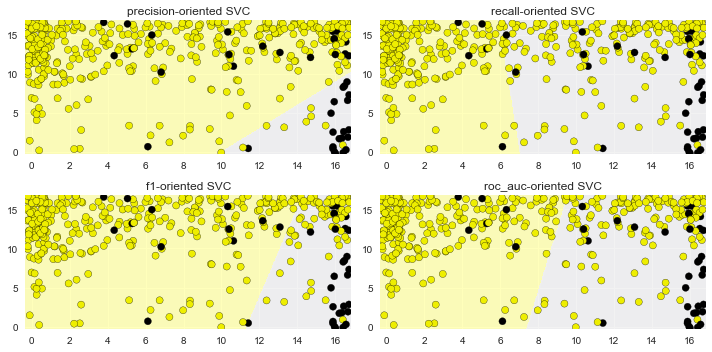

In [111]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(10,5))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()


#### Precision-recall curve for the default SVC classifier (with balanced class weights)

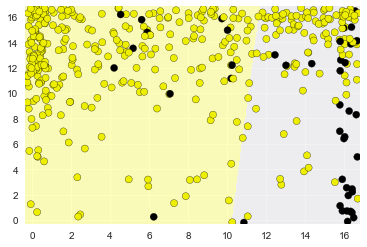

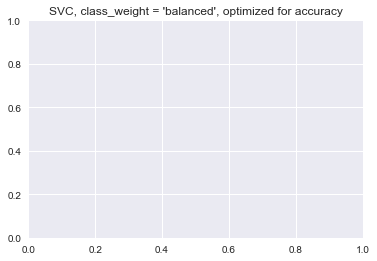

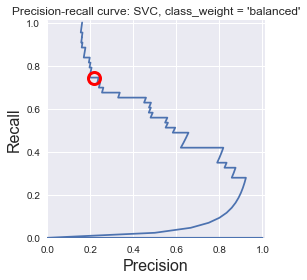

At zero threshold, precision: 0.22, recall: 0.74


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))